In [2]:
import numpy as np
from PIL import Image, ImageFilter, ImageDraw

In [2]:
import os
import sys
os.path.dirname(sys.executable)

'C:\\Users\\Dax\\anaconda3'

In [3]:
w, h = 3840, 2160

In [3]:
img = np.zeros([h, w], dtype=np.uint8)

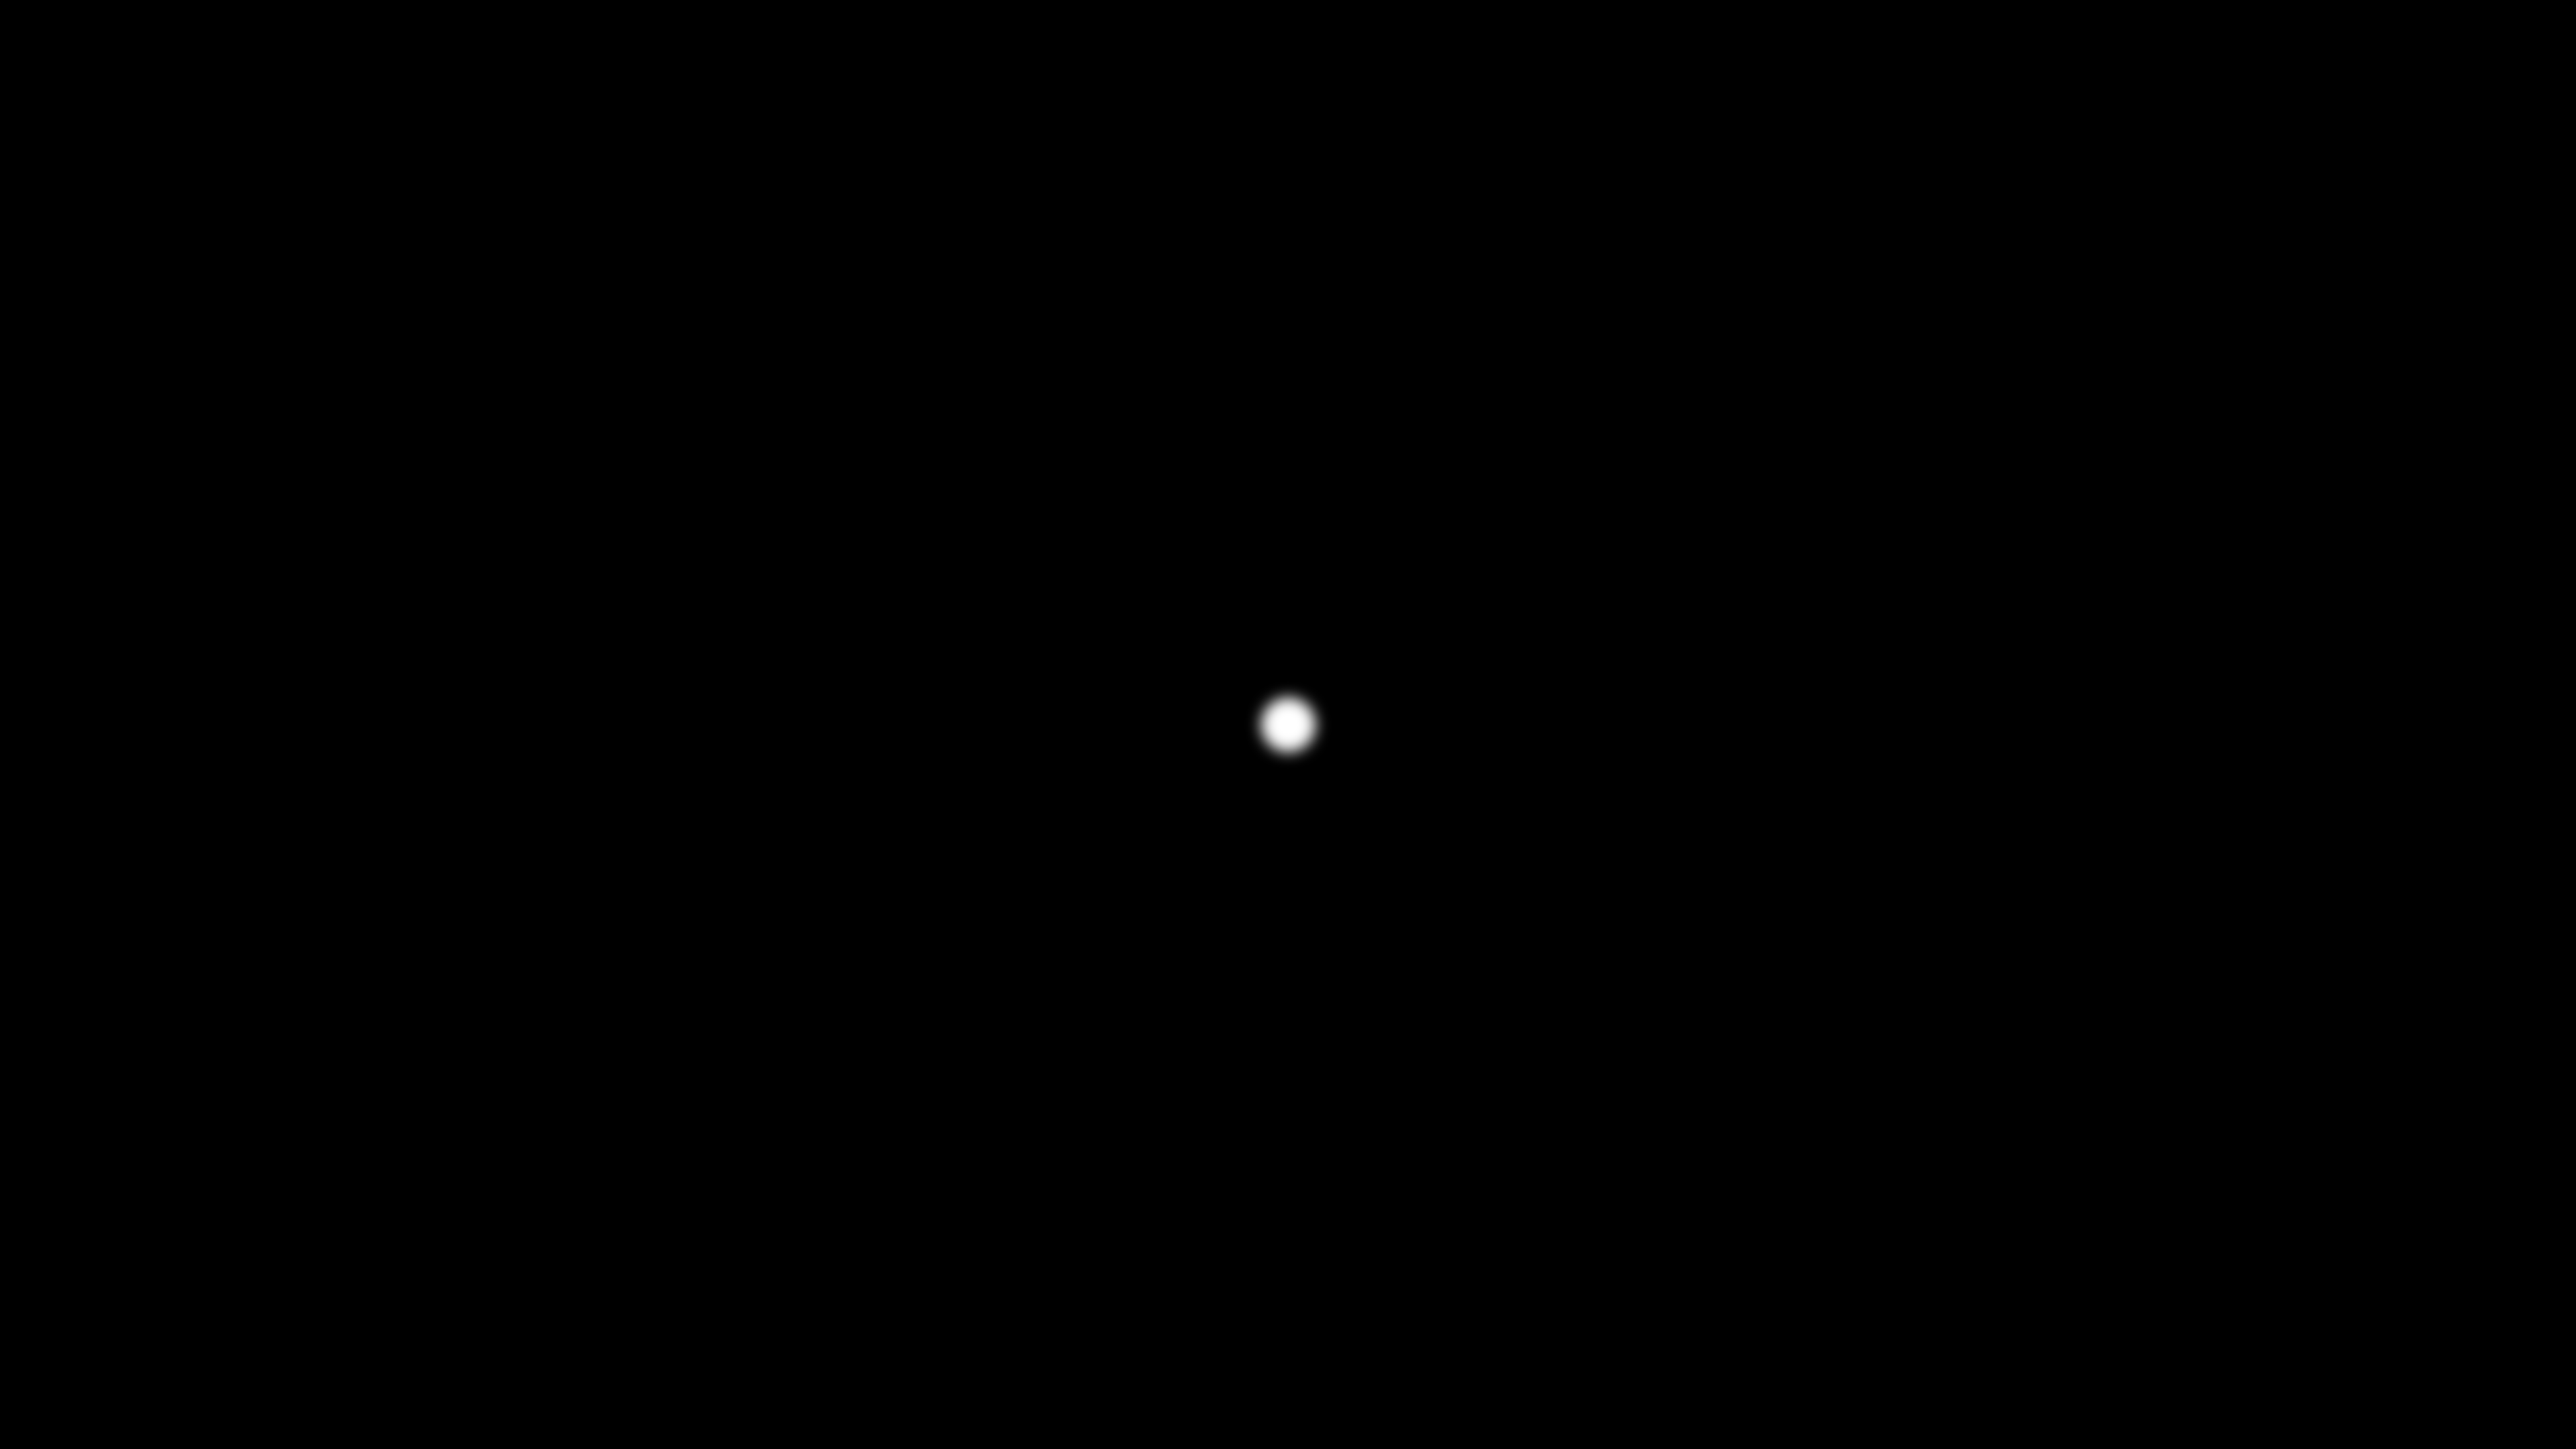

In [17]:
center = Image.new("L", (w, h))
_center = ImageDraw.Draw(center)
_center.ellipse([(w/2 - 40, h/2 - 40), (w/2 + 40, h/2 + 40)], fill='white')
center.filter(ImageFilter.GaussianBlur(radius = 10))

In [12]:
_varianceW = np.random.randint(low = 80, high = w-80, size = 15)
_varianceH = np.random.randint(low = 80, high = h-80, size = 15)
_varianceS = np.random.randint(low = 40, high = 200, size = 15)

In [5]:
_size = 5
for x in range(0, 20):
    imgC = Image.new("L", (w, h))
    _imgC = ImageDraw.Draw(imgC)
    _imgC.ellipse([(w/2 - _size, h/2 - _size), (w/2 + _size, h/2 + _size)], fill='white')
    imgC1 = imgC.filter(ImageFilter.GaussianBlur(radius = 10));
    _size = _size + 2
    imgC1.save("circle-calib-W{}-H{}-S{}.jpg".format(w/2, h/2, _size))
    print("finished an image")

finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image


In [15]:
for x in range(0, 15):
    _h, _w, _s = _varianceH[x], _varianceW[x], _varianceS[x]
    
    imgC = Image.new("L", (w, h))
    _imgC = ImageDraw.Draw(imgC)
    _imgC.ellipse([(_w - _s, _h - _s), (_w + _s, _h + _s)], fill='white')
    imgC1 = imgC.filter(ImageFilter.GaussianBlur(radius = 10));
    imgC1.save("circle-calib-W{}-H{}-S{}.jpg".format(_w, _h, _s))
    print("finished an image")

finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image
finished an image


In [49]:
for i in range(0, w, 5):
    _img = np.zeros([h, w], dtype=np.uint8)
    shift = 40 
    if i + 40 > w:
        shift = w - i
    #shift = i + 40 >= 3840? 3940 - i : 40
    _img[:,i:i+shift] = 255
    _res = Image.fromarray(_img)
    _res1 = _res.filter(ImageFilter.GaussianBlur(radius=10));
    _res1.save("../Optical Research/Inputs/calib{}.jpg".format(i/5))

In [59]:
for i in range(0, h, 5):
    _img = np.zeros([h, w], dtype=np.uint8)
    shift = 40 
    if i + 40 > h:
        shift = h - i
    #shift = i + 40 >= 3840? 3940 - i : 40
    _img[i:i+shift:,] = 255
    _res = Image.fromarray(_img)
    _res1 = _res.filter(ImageFilter.GaussianBlur(radius=10));
    _res1.save("../Optical Research/Inputs/calib-h{}.jpg".format(i/5))

In [55]:
import subprocess
#calibrations = "calib{}.0".format(i) for i in range (0, 20)
#print(calibrations)
subprocess.run(["../Optical Research/NikonControl/Program/bin/Debug/net6.0/Program.exe", "calib444.0"])

CompletedProcess(args=['../Optical Research/NikonControl/Program/bin/Debug/net6.0/Program.exe', 'calib444.0'], returncode=0)

In [33]:
img[:,1900:1940] = 255

In [34]:
res = Image.fromarray(img)

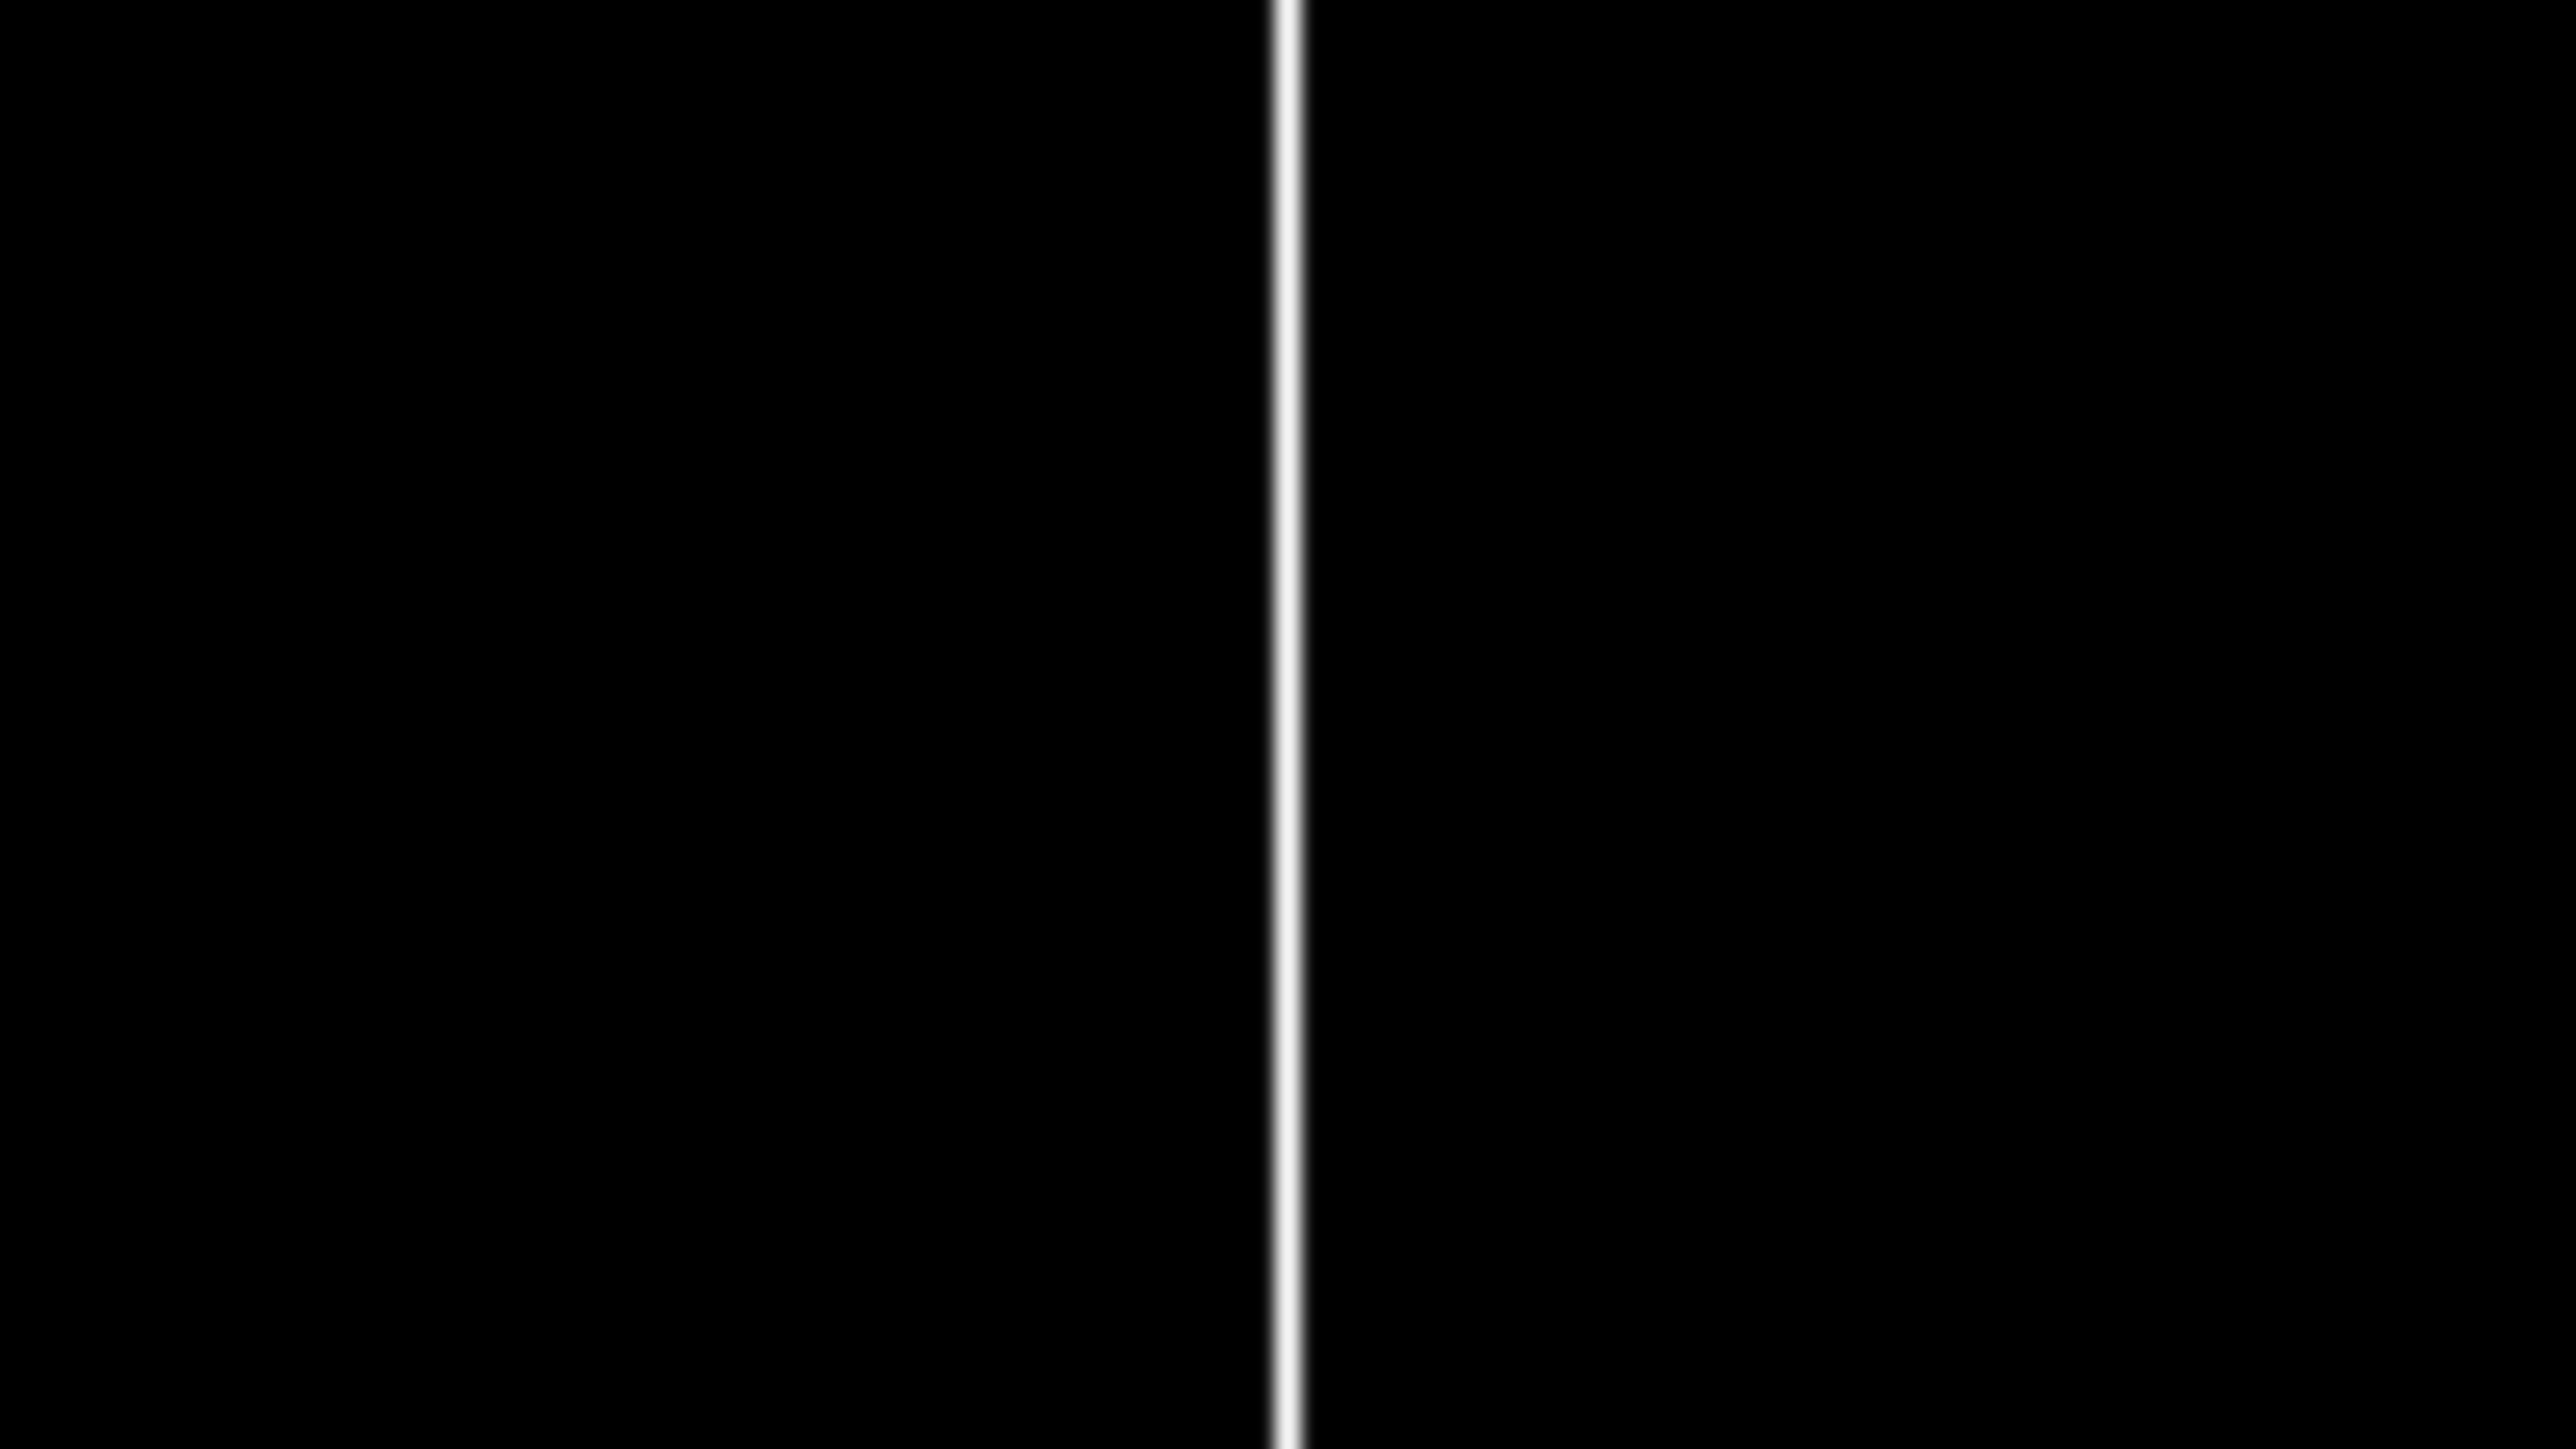

In [36]:
res.filter(ImageFilter.GaussianBlur(radius = 10))

In [27]:
res.show()